3. CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION

Aishik Mukherjee

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


In [12]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\AM00431051\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [130]:
credit_card_data = pd.read_csv("D:\\Aishik Personal Data\\Data Sience\\Analytixlabs\\Python\\Final Case study\\3. CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION\\CREDIT CARD USERS DATA.csv")
credit_card_data
#credit_card_data.dtypes

C:\Users\AM00431051\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,9662-FUSYIM-1IV,4.0,4.00,0.0,64.0,5.0,August,17.0,4.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7432-QKQFJJ-K72,2.0,5.00,1.0,52.0,5.0,July,14.0,2.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8959-RZWRHU-ST8,3.0,4.00,1.0,44.0,4.0,October,16.0,3.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9124-DZALHM-S6I,2.0,3.00,1.0,66.0,6.0,October,12.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,3512-MUWBGY-52X,2.0,2.00,0.0,47.0,4.0,July,11.0,1.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
credit_card_data.shape

(5000, 132)

In [81]:
credit_card_data.describe()

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,5000.0000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.15120,9.730400,2.9326,...,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.35828,9.690929,1.4533,...,0.250393,0.400788,0.48209,0.499617,0.499415,0.383223,0.499299,0.276815,0.336117,0.303466
min,1.00000,0.000000,18.000000,2.000000,6.000000,1.000000,1.0000,0.00000,0.000000,1.0000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,0.000000,31.000000,3.000000,12.000000,2.000000,1.0000,0.00000,2.000000,2.0000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.00000,1.000000,47.000000,4.000000,14.000000,2.000000,2.0000,0.00000,7.000000,3.0000,...,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.00000,1.000000,62.000000,5.000000,17.000000,4.000000,4.0000,0.00000,15.000000,4.0000,...,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.00000,1.000000,79.000000,6.000000,23.000000,5.000000,6.0000,1.00000,52.000000,5.0000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Adding a new column to hold the total spent from card 1 and card 2 by the customer.

In [132]:
credit_card_data['TotalSpent'] = credit_card_data['cardspent'] + credit_card_data['card2spent']

In [36]:
credit_card_data.describe()

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,TotalSpent
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,5000.0000,...,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,3.00140,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.15120,9.730400,2.9326,...,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600,498.07863
std,1.42176,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.35828,9.690929,1.4533,...,0.400788,0.48209,0.499617,0.499415,0.383223,0.499299,0.276815,0.336117,0.303466,351.52927
min,1.00000,0.000000,18.000000,2.000000,6.000000,1.000000,1.0000,0.00000,0.000000,1.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.11000
25%,2.00000,0.000000,31.000000,3.000000,12.000000,2.000000,1.0000,0.00000,2.000000,2.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,276.28250
50%,3.00000,1.000000,47.000000,4.000000,14.000000,2.000000,2.0000,0.00000,7.000000,3.0000,...,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,414.25000
75%,4.00000,1.000000,62.000000,5.000000,17.000000,4.000000,4.0000,0.00000,15.000000,4.0000,...,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,615.56250
max,5.00000,1.000000,79.000000,6.000000,23.000000,5.000000,6.0000,1.00000,52.000000,5.0000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4881.05000


In [133]:
num_vars = [key for key in dict(credit_card_data.dtypes) if dict(credit_card_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
num_vars

['region',
 'gender',
 'age',
 'agecat',
 'ed',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'income',
 'lninc',
 'inccat',
 'debtinc',
 'creddebt',
 'othdebt',
 'default',
 'jobsat',
 'marital',
 'spoused',
 'spousedcat',
 'reside',
 'pets',
 'pets_cats',
 'pets_dogs',
 'pets_birds',
 'pets_reptiles',
 'pets_small',
 'pets_saltfish',
 'pets_freshfish',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carvalue',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'card2tenure',
 'card2tenurecat',
 'carditems',
 'cardspent',
 'card2items',
 'card2spen

In [136]:
cat_vars = [key for key in dict(credit_card_data.dtypes) if dict(credit_card_data.dtypes)[key] in ['object']]
cat_vars

['custid', 'birthmonth']

In [135]:
credit_card_data['townsize'] = credit_card_data['townsize'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)
credit_card_data['lncreddebt'] = credit_card_data['lncreddebt'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)
credit_card_data['lnothdebt'] = credit_card_data['lnothdebt'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)
credit_card_data['commutetime'] = credit_card_data['commutetime'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)
credit_card_data['longten'] = credit_card_data['longten'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)

credit_card_data['lntollmon'] = credit_card_data['lntollmon'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)
credit_card_data['lntollten'] = credit_card_data['lntollten'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)
credit_card_data['lnequipmon'] = credit_card_data['lnequipmon'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)
credit_card_data['lnequipten'] = credit_card_data['lnequipten'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)
credit_card_data['lncardmon'] = credit_card_data['lncardmon'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)

credit_card_data['cardten'] = credit_card_data['cardten'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)
credit_card_data['lncardten'] = credit_card_data['lncardten'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)
credit_card_data['lnequipmon'] = credit_card_data['lnequipmon'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)
credit_card_data['lnwiremon'] = credit_card_data['lnwiremon'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)
credit_card_data['lnwireten'] = credit_card_data['lnwireten'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)
credit_card_data['lnlongten'] = credit_card_data['lnlongten'].astype(str).replace('#NULL!','-999.999').astype(float).replace(-999.999,np.NaN)

In [162]:
credit_card_cat = credit_card_data[cat_vars]
credit_card_cat.head()

,custid,birthmonth
0,3964-QJWTRG-NPN,September
1,0648-AIPJSP-UVM,May
2,5195-TLUDJE-HVO,June
3,4459-VLPQUH-3OL,May
4,8158-SMTQFB-CNO,July


In [143]:
credit_card_num = credit_card_data[num_vars]
credit_card_num.head()

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,TotalSpent
0,1.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,149.46
1,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,77.54
2,3.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,359.97
3,4.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
4,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,507.83


In [144]:
def num_summary(x) :
    return pd.Series([x.count(), x.min(),x.max(),x.mean()],index=['count','min','max','mean'])

In [146]:
summary = credit_card_num.apply(lambda x: num_summary(x)).T
summary

,count,min,max,mean
region,5000.0,1.00,5.00,3.001400
gender,5000.0,0.00,1.00,0.503600
age,5000.0,18.00,79.00,47.025600
agecat,5000.0,2.00,6.00,4.238800
ed,5000.0,6.00,23.00,14.543000
edcat,5000.0,1.00,5.00,2.672000
jobcat,5000.0,1.00,6.00,2.752800
union,5000.0,0.00,1.00,0.151200
employ,5000.0,0.00,52.00,9.730400
empcat,5000.0,1.00,5.00,2.932600


In [147]:
def fillna_val(x) :
    x = x.fillna(x.mean)
    return x

In [149]:
credit_card_num = credit_card_num.apply(lambda x: fillna_val(x))

In [150]:
credit_card_num.head()

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,TotalSpent
0,1.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,149.46
1,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,77.54
2,3.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,359.97
3,4.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
4,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,507.83


In [151]:
def outlier_treatment(x) : 
    x = x.clip_upper(x.quantile(0.99))
    x= x.clip_lower(x.quantile(0.01))
    return x

In [153]:
credit_card_num = credit_card_num.apply(lambda x: outlier_treatment(x))
credit_card_num.head()

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,TotalSpent
0,1.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,149.46
1,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,77.54
2,3.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,359.97
3,4.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
4,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,507.83


In [158]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [157]:
credit_card_cat.head()

,custid,birthmonth
0,3964-QJWTRG-NPN,September
1,0648-AIPJSP-UVM,May
2,5195-TLUDJE-HVO,June
3,4459-VLPQUH-3OL,May
4,8158-SMTQFB-CNO,July


In [163]:

credit_card_cat['birthmonth'] = credit_card_cat['birthmonth'].astype('category')
credit_card_cat = create_dummies(credit_card_cat, 'birthmonth')

C:\Users\AM00431051\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [164]:
credit_card_cat.head()

,custid,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September
0,3964-QJWTRG-NPN,0,0,0,0,0,0,0,0,0,0,1
1,0648-AIPJSP-UVM,0,0,0,0,0,0,0,1,0,0,0
2,5195-TLUDJE-HVO,0,0,0,0,0,1,0,0,0,0,0
3,4459-VLPQUH-3OL,0,0,0,0,0,0,0,1,0,0,0
4,8158-SMTQFB-CNO,0,0,0,0,1,0,0,0,0,0,0


In [167]:
credit_card_new = pd.concat([credit_card_num, credit_card_cat], axis=1)


In [168]:
credit_card_new.head()

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September
0,1.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,3.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,5.0,...,0,0,0,0,1,0,0,0,0,0
3,4.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0


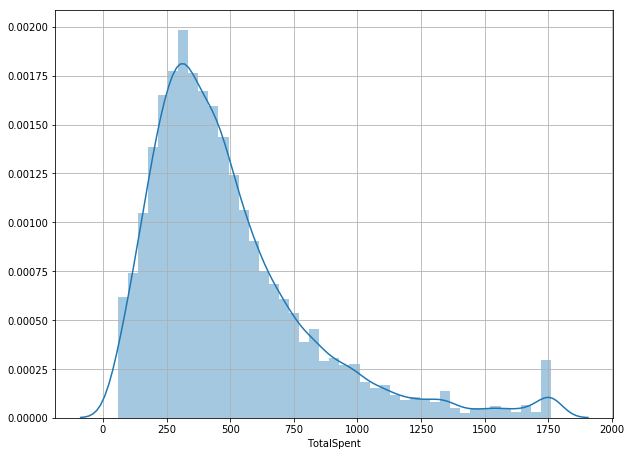

In [169]:
sns.distplot(credit_card_new.TotalSpent)

In [178]:
credit_card_new['ln_totalspent'] = np.log(credit_card_new['TotalSpent']+1)

In [179]:
credit_card_new.head()

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,ln_totalspent
0,1.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,5.013697
1,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,4.363608
2,3.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,5.0,...,0,0,0,1,0,0,0,0,0,5.888795
3,4.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,5.887242
4,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,6.232114


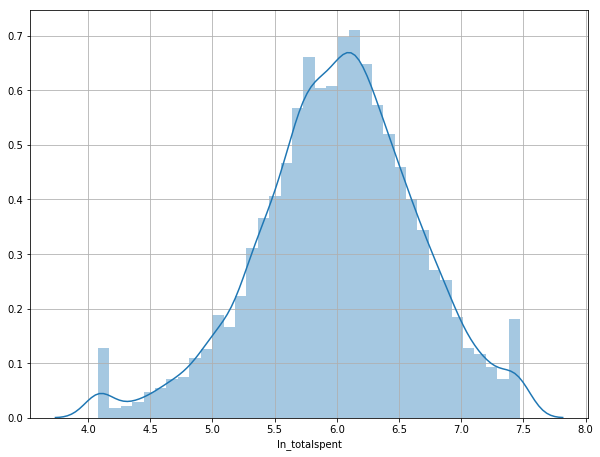

In [180]:
sns.distplot(credit_card_new.ln_totalspent)

In [181]:
credit_card_new = credit_card_new.drop(['TotalSpent'],axis=1)

In [182]:
credit_card_new.columns

Index(['region', 'gender', 'age', 'agecat', 'ed', 'edcat', 'jobcat', 'union',
       'employ', 'empcat',
       ...
       'birthmonth_February', 'birthmonth_January', 'birthmonth_July',
       'birthmonth_June', 'birthmonth_March', 'birthmonth_May',
       'birthmonth_November', 'birthmonth_October', 'birthmonth_September',
       'ln_totalspent'],
      dtype='object', length=128)

In [200]:
corr = credit_card_new.corr()
corr['ln_totalspent'].sort_values()

card                   -0.237489
retire                 -0.198196
gender                 -0.078624
card2                  -0.077245
commutebike            -0.025766
cardbenefit            -0.020132
card2fee               -0.019780
pets_birds             -0.018395
birthmonth_February    -0.018367
reason                 -0.016198
hometype               -0.016069
commutecat             -0.015063
commutebus             -0.012674
commutenonmotor        -0.011790
commuterail            -0.011191
jobcat                 -0.010533
commute                -0.009813
response_01            -0.009181
card2type              -0.009008
cardfee                -0.008531
birthmonth_September   -0.007369
pets_freshfish         -0.006439
birthmonth_July        -0.006062
carbought              -0.005618
pets                   -0.004720
active                 -0.004494
commutepublic          -0.004108
pets_small             -0.003694
birthmonth_May         -0.003614
commutewalk            -0.003351
          

In [232]:
credit_card_new = credit_card_new.drop(['custid'], axis=1)

In [233]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(credit_card_new, test_size = 0.3, random_state = 123)

In [234]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['region', 'gender', 'age', 'agecat', 'ed', 'edcat', 'jobcat', 'union',
       'employ', 'empcat',
       ...
       'birthmonth_February', 'birthmonth_January', 'birthmonth_July',
       'birthmonth_June', 'birthmonth_March', 'birthmonth_May',
       'birthmonth_November', 'birthmonth_October', 'birthmonth_September',
       'ln_totalspent'],
      dtype='object', length=127)

In [235]:
all_columns = "+".join(train.columns.difference( ['ln_totalspent'] ))

print (all_columns)

active+address+addresscat+age+agecat+bfast+birthmonth_August+birthmonth_December+birthmonth_February+birthmonth_January+birthmonth_July+birthmonth_June+birthmonth_March+birthmonth_May+birthmonth_November+birthmonth_October+birthmonth_September+callcard+callid+callwait+carbought+carbuy+carcatvalue+card+card2+card2benefit+card2fee+card2items+card2spent+card2tenure+card2tenurecat+card2type+cardbenefit+cardfee+carditems+cardmon+cardspent+cardtenure+cardtenurecat+cardtype+carown+cars+cartype+carvalue+churn+commute+commutebike+commutebus+commutecar+commutecarpool+commutecat+commutemotorcycle+commutenonmotor+commutepublic+commuterail+commutewalk+confer+creddebt+debtinc+default+ebill+ed+edcat+empcat+employ+equip+equipmon+equipten+forward+gender+homeown+hometype+hourstv+inccat+income+internet+jobcat+jobsat+lninc+lnlongmon+longmon+marital+multline+news+othdebt+owncd+owndvd+ownfax+owngame+ownipod+ownpc+ownpda+owntv+ownvcr+pager+pets+pets_birds+pets_cats+pets_dogs+pets_freshfish+pets_reptiles+pets

In [236]:
my_formula = "ln_totalspent~" + all_columns

print (my_formula)

ln_totalspent~active+address+addresscat+age+agecat+bfast+birthmonth_August+birthmonth_December+birthmonth_February+birthmonth_January+birthmonth_July+birthmonth_June+birthmonth_March+birthmonth_May+birthmonth_November+birthmonth_October+birthmonth_September+callcard+callid+callwait+carbought+carbuy+carcatvalue+card+card2+card2benefit+card2fee+card2items+card2spent+card2tenure+card2tenurecat+card2type+cardbenefit+cardfee+carditems+cardmon+cardspent+cardtenure+cardtenurecat+cardtype+carown+cars+cartype+carvalue+churn+commute+commutebike+commutebus+commutecar+commutecarpool+commutecat+commutemotorcycle+commutenonmotor+commutepublic+commuterail+commutewalk+confer+creddebt+debtinc+default+ebill+ed+edcat+empcat+employ+equip+equipmon+equipten+forward+gender+homeown+hometype+hourstv+inccat+income+internet+jobcat+jobsat+lninc+lnlongmon+longmon+marital+multline+news+othdebt+owncd+owndvd+ownfax+owngame+ownipod+ownpc+ownpda+owntv+ownvcr+pager+pets+pets_birds+pets_cats+pets_dogs+pets_freshfish+pets

In [237]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = my_formula, data = train).fit()

In [238]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ln_totalspent   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     218.2
Date:                Tue, 26 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:17:24   Log-Likelihood:                 394.71
No. Observations:                3500   AIC:                            -535.4
Df Residuals:                    3373   BIC:                             247.0
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.2661      0.089     47.897      0.000       4.091       4.441
active                  -0.0029      0.008     -0.365      0.715      -0.018       0.013
address                  0.0006      0.001      0.685      0.493      -0.001       0.002
addresscat              -0.0131      0.009     -1.428      0.153      -0.031       0.005
age                     -0.0012      0.001     -1.121      0.262      -0.003       0.001
agecat                   0.0157      0.013      1.228      0.219      -0.009       0.041
bfast                    0.0050      0.005      1.053      0.292      -0.004       0.014
birthmonth_August        0.0044      0.019      0.234      0.815      -0.032       0.041
birthmonth_December      0.0009      0.019      0.047      0.963      -0.037       0.038
birthmonth_February     -0.0147      0.019     -0.776      0.438      -0.052       0.022
birthmonth_January       0.0081      0.019      0.428      0.669      -0.029       0.045
birthmonth_July         -0.0007      0.019     -0.037      0.970      -0.037       0.036
birthmonth_June         -0.0071      0.019     -0.382      0.703      -0.044       0.029
birthmonth_March        -0.0057      0.019     -0.300      0.764      -0.043       0.031
birthmonth_May          -0.0047      0.018     -0.254      0.800      -0.041       0.031
birthmonth_November     -0.0221      0.019     -1.171      0.242      -0.059       0.015
birthmonth_October       0.0047      0.019      0.249      0.803      -0.032       0.041
birthmonth_September    -0.0195      0.018     -1.071      0.284      -0.055       0.016
callcard             -1.516e-05      0.013     -0.001      0.999      -0.026       0.026
callid                  -0.0046      0.011     -0.405      0.686      -0.027       0.017
callwait                 0.0022      0.011      0.198      0.843      -0.020       0.024
carbought                0.0008      0.008      0.100      0.921      -0.016       0.017
carbuy                  -0.0045      0.008     -0.555      0.579      -0.021       0.011
carcatvalue             -0.0259      0.010     -2.510      0.012      -0.046      -0.006
card                    -0.0241      0.004     -6.485      0.000      -0.031      -0.017
card2                   -0.0161      0.004     -4.545      0.000      -0.023      -0.009
card2benefit             0.0014      0.003      0.411      0.681      -0.005       0.008
card2fee                 0.0182      0.010      1.878      0.060      -0.001       0.037
card2items               0.0603      0.002     25.085      0.000       0.056       0.065
card2spent               0.0010   5.81e-05     17.613      0.000       0.001       0.001
card2tenure             -0.0013      0.002     -0.532      0.595      -0.006       0.003
card2tenurecat           0.0004      0.011      0.038    

In [240]:
test.columns= [phrase.strip().replace('-', '') for phrase in test.columns]
test.columns

Index(['region', 'gender', 'age', 'agecat', 'ed', 'edcat', 'jobcat', 'union',
       'employ', 'empcat',
       ...
       'birthmonth_February', 'birthmonth_January', 'birthmonth_July',
       'birthmonth_June', 'birthmonth_March', 'birthmonth_May',
       'birthmonth_November', 'birthmonth_October', 'birthmonth_September',
       'ln_totalspent'],
      dtype='object', length=127)

In [242]:
pred = lm.predict(train)
pred.head()

4036    6.336147
2883    5.342412
4162    5.464243
4640    6.112067
2430    8.024183
dtype: float64

In [244]:
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(train.ln_totalspent, pred))
print ('MSE:', metrics.mean_squared_error(train.ln_totalspent, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_totalspent, pred)))
print ('R-Squre:', metrics.r2_score(train.ln_totalspent, pred))

MAE: 0.16138672339521756
MSE: 0.04672729030321746
RMSE: 0.21616496085910283
R-Squre: 0.890741467061751


In [245]:
pred = lm.predict(test)
pred.head(5)

2648    5.646127
2456    6.259808
4557    6.553021
4884    5.804333
92      6.177727
dtype: float64

In [246]:
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(test.ln_totalspent, pred))
print ('MSE:', metrics.mean_squared_error(test.ln_totalspent, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_totalspent, pred)))
print ('R-Squre:', metrics.r2_score(test.ln_totalspent, pred))

MAE: 0.1611060854225871
MSE: 0.045748217735072975
RMSE: 0.2138883300581707
R-Squre: 0.8789194074299762
